In [1]:
#importing all the required libraries:

import numpy as np
import pandas as pd

#for visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

#import pandas_profiling package for a quick overview of the dataset (Please install this package)
import pandas_profiling as pp

#to scale data:
from sklearn.preprocessing import scale

#for building model:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


#to display all rows and columns:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)

In [2]:
#loading the data

df=pd.read_csv(r'C:\Users\Ajay\Documents\train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape


(1460, 81)

In [5]:
pp.ProfileReport(df)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## From the report generated above:

1.Number of variables- 81(Numeric-38 and Categorical-43) <br>
2.Number of observations-1460 <br>
3.Total Missing value percentage- 5.9% <br>

# Details about the variables that have missing values:

1. Alley has 1369 / 93.8% missing values.<br>
2. BsmtCond has 37 / 2.5% missing values.<br>
3. BsmtExposure has 38 / 2.6% missing values.<br>
4. BsmtFinType1 has 37 / 2.5% missing values.<br>
5. BsmtFinType2 has 38 / 2.6% missing values.<br>
6. BsmtQual has 37 / 2.5% missing values.<br>
7. Fence has 1179 / 80.8% missing values.<br>
8. FireplaceQu has 690 / 47.3% missing values.<br>
9. GarageCond has 81 / 5.5% missing values.<br>
10. GarageFinish has 81 / 5.5% missing values.<br>
11. GarageQual has 81 / 5.5% missing values.<br>
12. GarageType has 81 / 5.5% missing values.<br>
13. GarageYrBlt has 81 / 5.5% missing values.<br>
14. LotFrontage has 259 / 17.7% missing values.<br>
15. MiscFeature has 1406 / 96.3% missing values.<br>
16. PoolQC has 1453 / 99.5% missing values.<br>


# Details about the variables that have zeros:

1. 2ndFlrSF has 829 / 56.8% zeros.<br>
2. 3SsnPorch has 1436 / 98.4% zeros.<br>
3. BsmtFinSF1 has 467 / 32.0% zeros.<br>
4. BsmtFinSF2 has 1293 / 88.6% zeros.<br>
5. BsmtFullBath has 856 / 58.6% zeros.<br>
6. BsmtHalfBath has 1378 / 94.4% zeros.<br>
7. BsmtUnfSF has 118 / 8.1% zeros.<br>
8. EnclosedPorch has 1252 / 85.8% zeros.<br>
9. Fireplaces has 690 / 47.3% zeros.<br>
10. GarageArea has 81 / 5.5% zeros.<br>
11. GarageCars has 81 / 5.5% zeros.<br>
12. HalfBath has 913 / 62.5% zeros.<br>
13. LowQualFinSF has 1434 / 98.2% zeros.<br>
14. MasVnrArea has 861 / 59.0% zeros.<br>
15. MiscVal has 1408 / 96.4% zeros.<br>
16. OpenPorchSF has 656 / 44.9% zeros.<br>
17. PoolArea has 1453 / 99.5% zeros.<br>
18. ScreenPorch has 1344 / 92.1% zeros.<br>
19. TotalBsmtSF has 37 / 2.5% zeros.<br>
20. WoodDeckSF has 761 / 52.1% zeros.<br>



### Replacing all zeros with NAN and then filling the column with the mean:

In [6]:
def col(A):
    df[A]=df[A].replace(0,np.nan)
    df[A].fillna((df[A].mean()),inplace=True)
    return

In [7]:
col('2ndFlrSF')
col('3SsnPorch')
col('BsmtFinSF1')
col('BsmtFinSF2')
col('BsmtFullBath')
col('BsmtHalfBath')
col('BsmtUnfSF')
col('EnclosedPorch')
col('Fireplaces')
col('GarageArea')
col('GarageCars')
col('HalfBath')
col('LowQualFinSF')
col('MasVnrArea')
col('MiscVal')
col('OpenPorchSF')
col('PoolArea')
col('ScreenPorch')
col('TotalBsmtSF')
col('WoodDeckSF')

### Imputing values in columns:

In [8]:
#1. 'Alley':

df['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

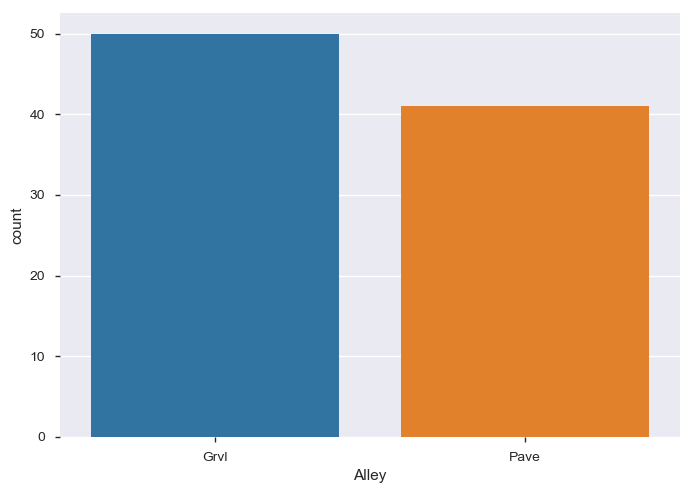

In [9]:
sns.countplot(df['Alley'])

Alley: Type of alley access to property<br>
Here NA means No alley access. So all missing values can be replaced with NA.

In [10]:
df['Alley']=df['Alley'].replace(np.nan,'No alley access')

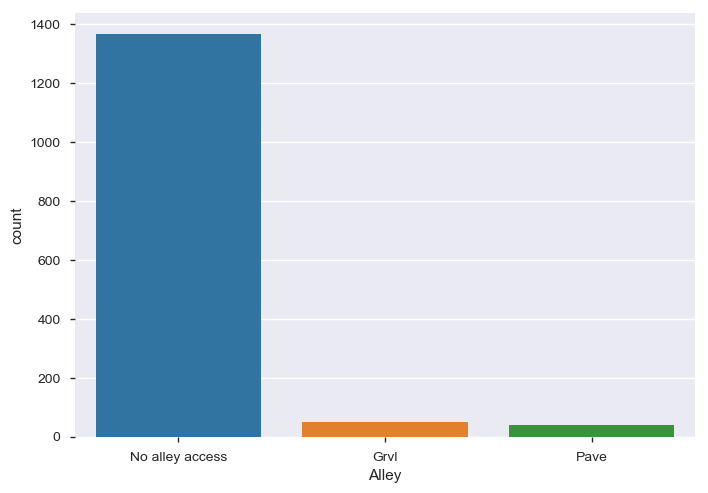

In [11]:
sns.countplot(df['Alley'])

In [12]:
#2. BsmtCond:

df['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

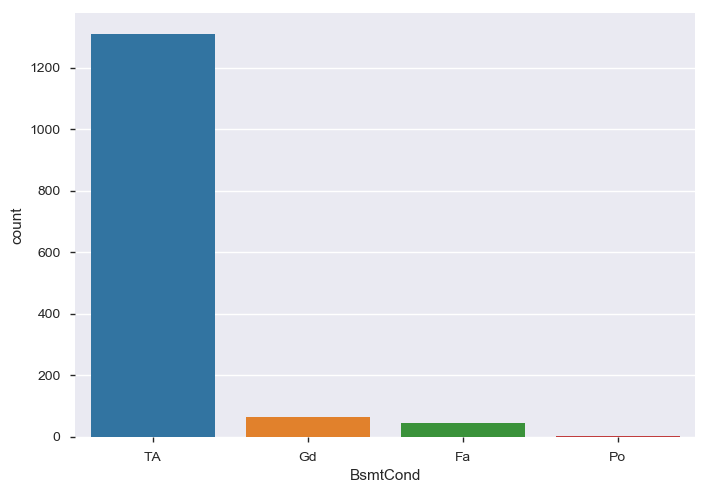

In [13]:
sns.countplot(df['BsmtCond'])

 BsmtCond-Evaluates the general condition of the basement:<br>
 Here NA means No Basement. So all missing values can be replaced with No Basement(NA).


In [14]:
df['BsmtCond']=df['BsmtCond'].replace(np.nan,'NA')

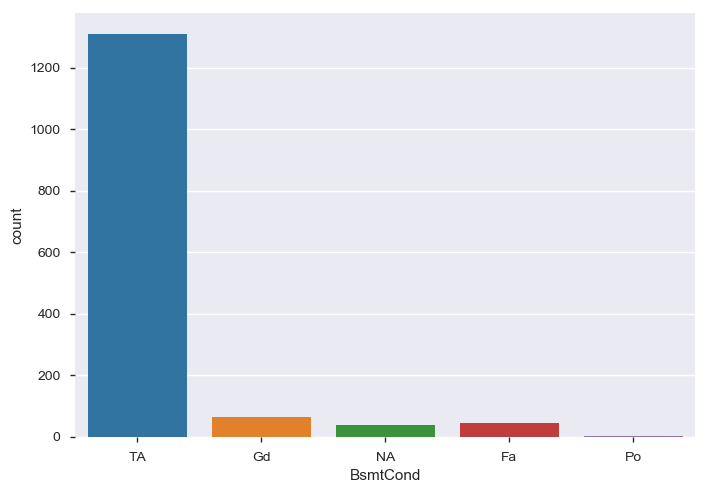

In [15]:
sns.countplot(df['BsmtCond'])

In [16]:
#3.BsmtExposure:

df['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

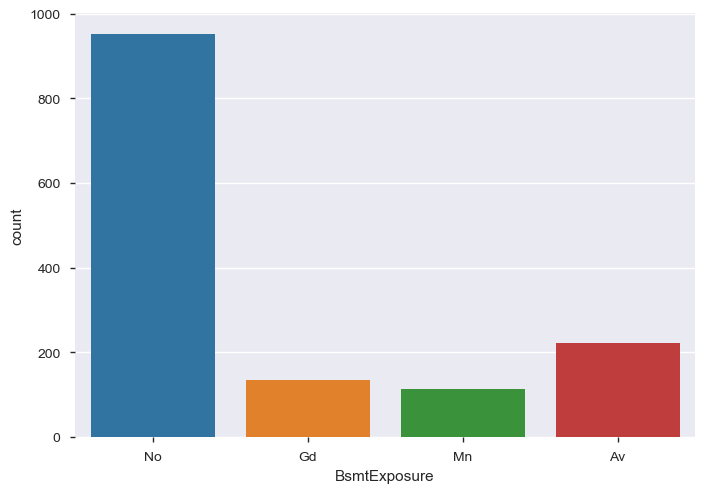

In [17]:
sns.countplot(df['BsmtExposure'])

BsmtExposure: Refers to walkout or garden level walls<br>
Missing values can be replaced with NA which means no basements.

In [18]:
df['BsmtExposure']=df['BsmtExposure'].replace(np.nan,'NA')

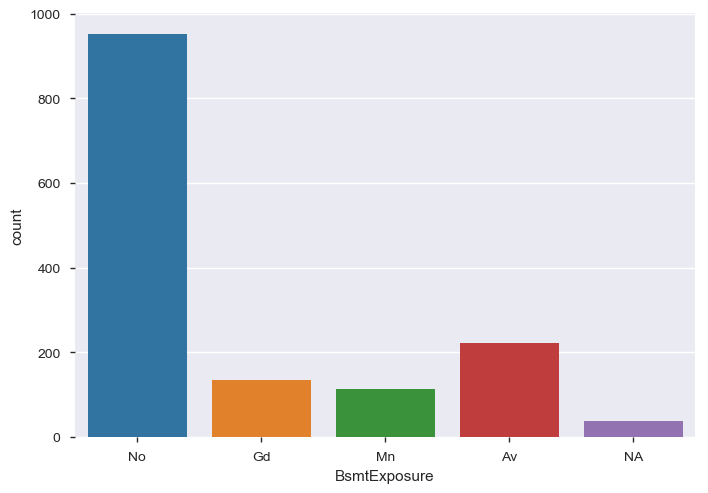

In [19]:
sns.countplot(df['BsmtExposure'])

In [20]:
#4. BsmtFinType1:

df['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

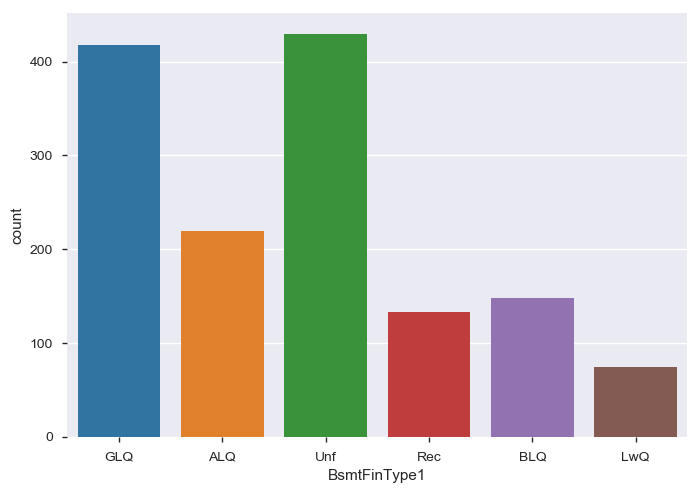

In [21]:
sns.countplot(df['BsmtFinType1'])

BsmtFinType1: Rating of basement finished area<br>
Here all missing values can be replaced with NA which means no basement.

In [22]:
df['BsmtFinType1']=df['BsmtFinType1'].replace(np.nan,'NA')

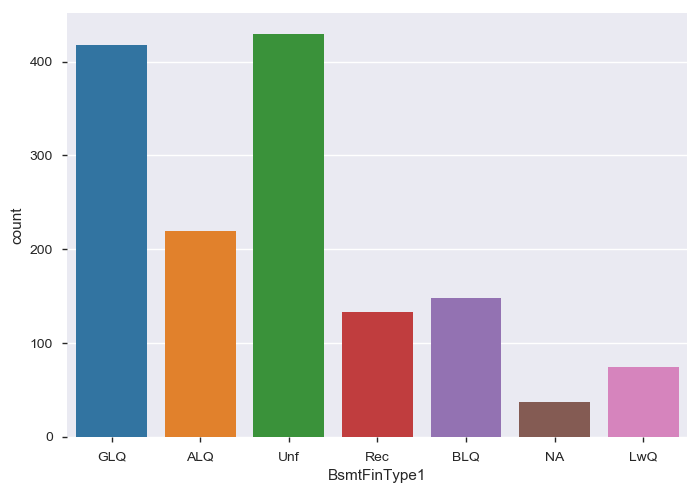

In [23]:
sns.countplot(df['BsmtFinType1'])

In [24]:
#5.BsmtFinType2:

df['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

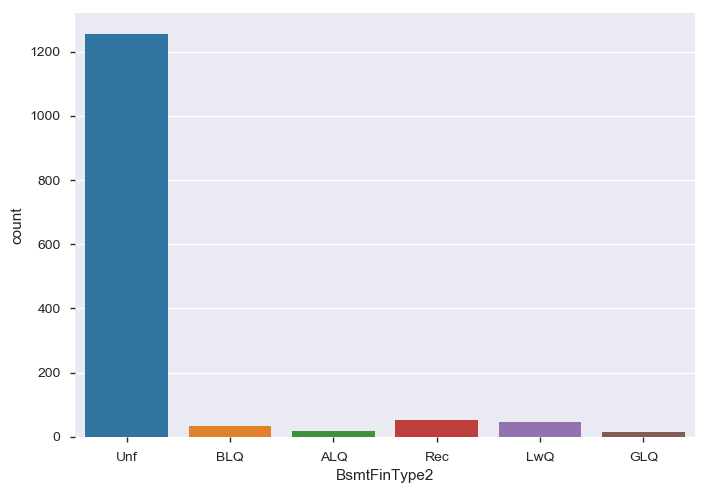

In [25]:
sns.countplot(df['BsmtFinType2'])

BsmtFinType2: Rating of basement finished area<br>
Here all missing values can be replaced with NA which means no basement.

In [26]:
df['BsmtFinType2']=df['BsmtFinType2'].replace(np.nan,'NA')

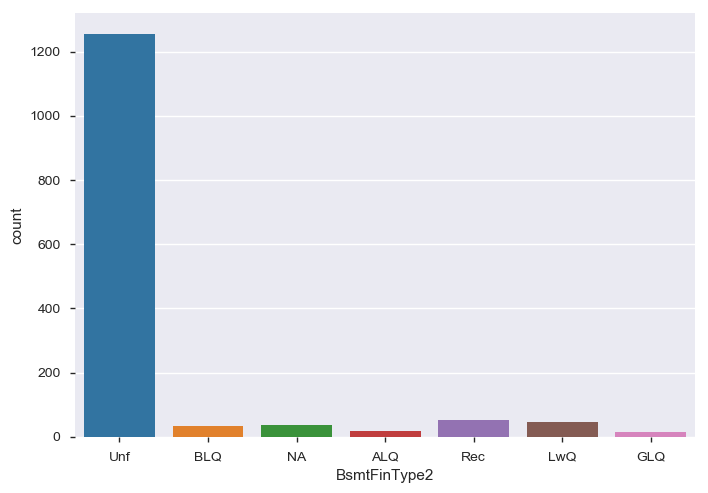

In [27]:
sns.countplot(df['BsmtFinType2'])

In [28]:
#6. BsmtQual:

df['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

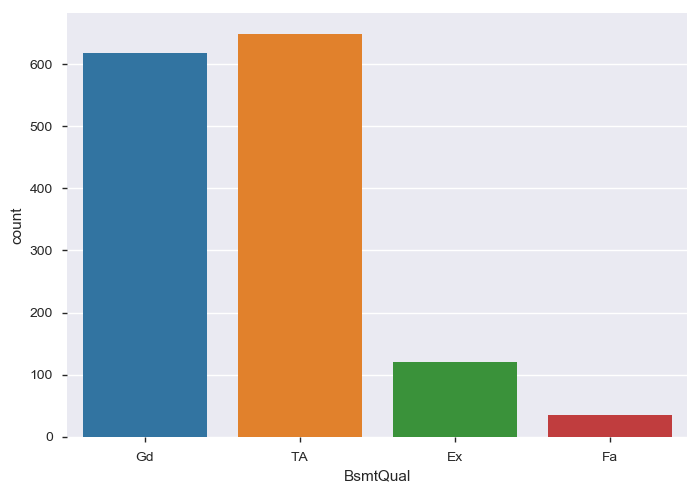

In [29]:
sns.countplot(df['BsmtQual'])

BsmtQual: Evaluates the height of the basement<br>
Here all missing values can be replaced with NA which means No basement.

In [30]:
df['BsmtQual']=df['BsmtQual'].replace(np.nan,'NA')

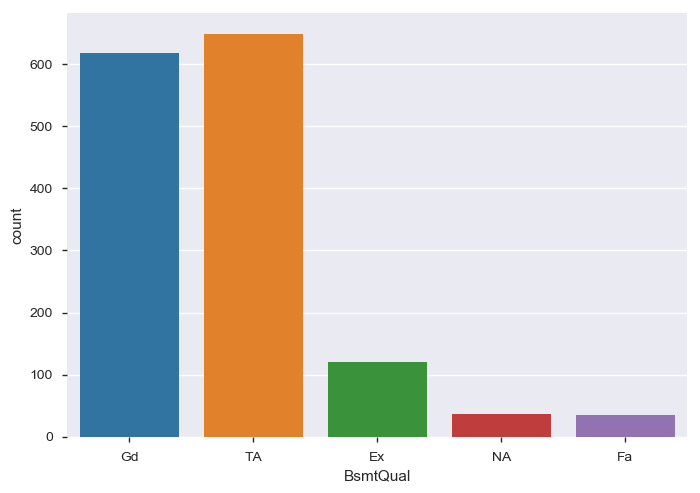

In [31]:
sns.countplot(df['BsmtQual'])

In [32]:
#7.Fence
df['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

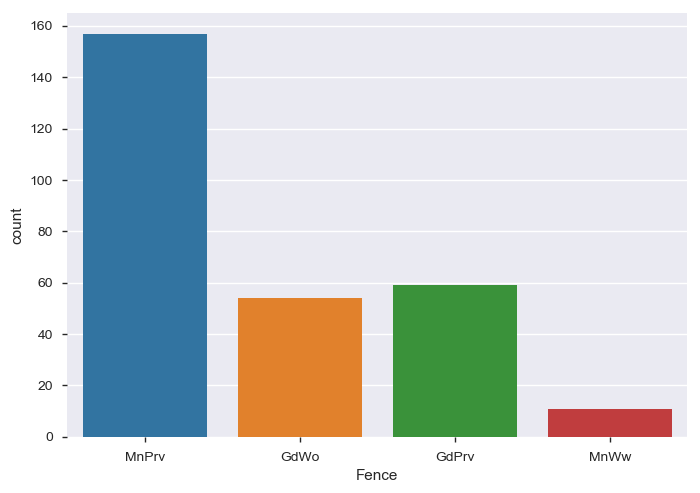

In [33]:
sns.countplot(df['Fence'])

Fence- Fence Quality.<br>
Here all missing values can be replaced with NA which means No Fence.

In [34]:
df['Fence']=df['Fence'].replace(np.nan,'NA')

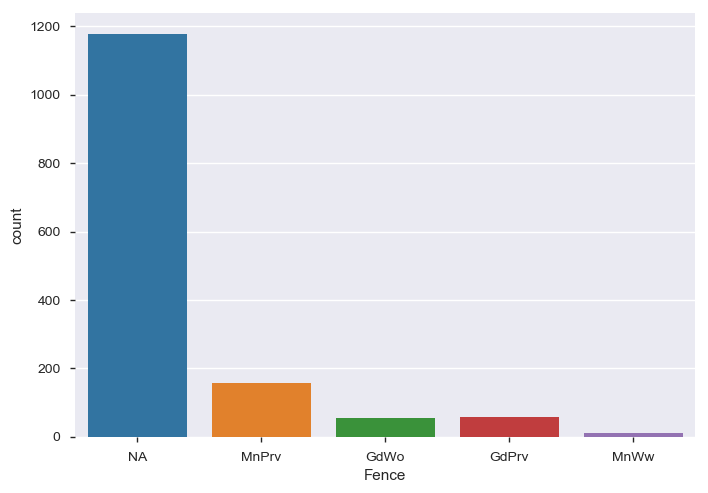

In [35]:
sns.countplot(df['Fence'])

In [36]:
#8.FireplaceQu
df['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

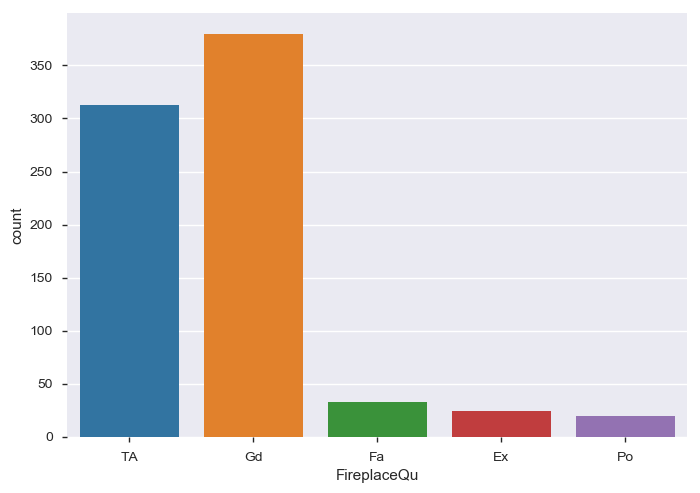

In [37]:
sns.countplot(df['FireplaceQu'])

FireplaceQu: Fireplace quality<br>
Here all missing values can be replaced with NA which means no fireplace.

In [38]:
df['FireplaceQu']=df['FireplaceQu'].replace(np.nan,'NA')

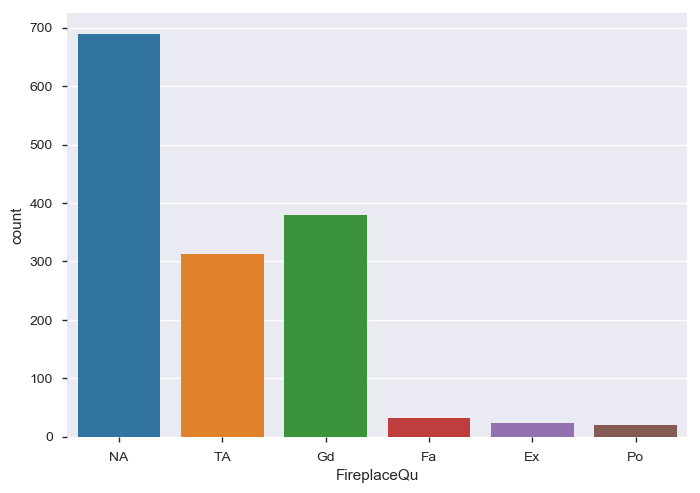

In [39]:
sns.countplot(df['FireplaceQu'])

In [40]:
#9.GarageCond

df['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

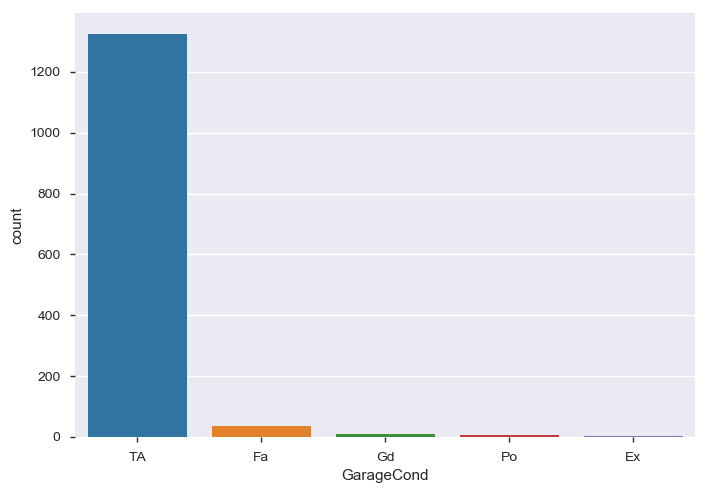

In [41]:
sns.countplot(df['GarageCond'])

GarageCond: Garage condition<br>
Here all missing values can be replaced with NA which means No Garage


In [42]:
df['GarageCond']=df['GarageCond'].replace(np.nan,'NA')

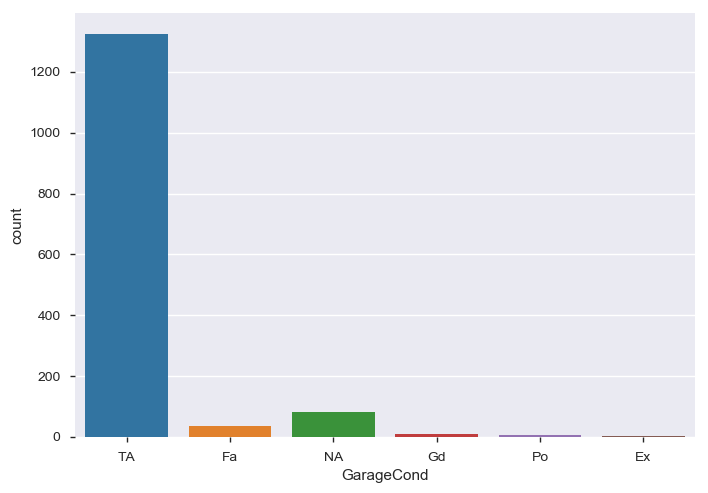

In [43]:
sns.countplot(df['GarageCond'])

In [44]:
#10. GarageFinish

df['GarageFinish'].describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

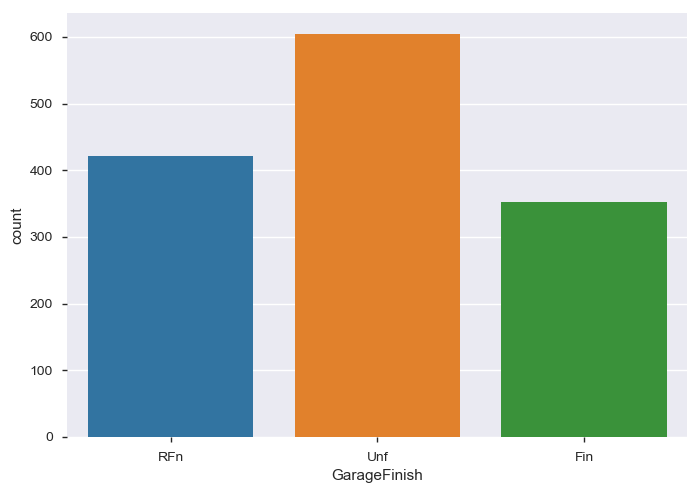

In [45]:
sns.countplot(df['GarageFinish'])

GarageFinish: Interior finish of the garage<br>
Here all missing values can be replaced with NA which means No Garage.

In [46]:
df['GarageFinish']=df['GarageFinish'].replace(np.nan,'NA')

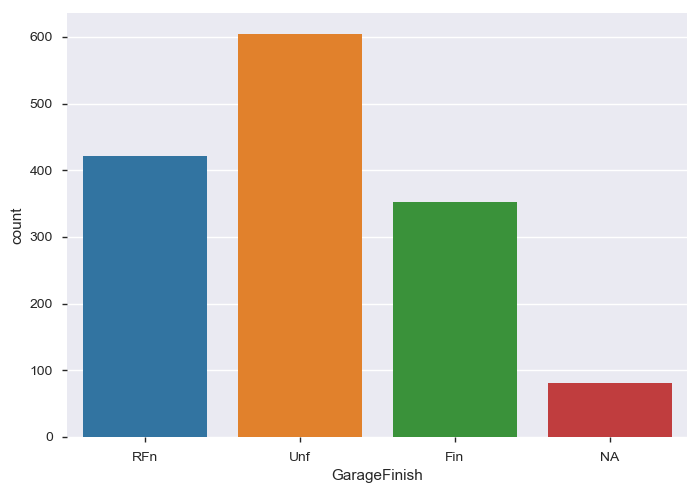

In [47]:
sns.countplot(df['GarageFinish'])

In [48]:
#11.GarageQual

df['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

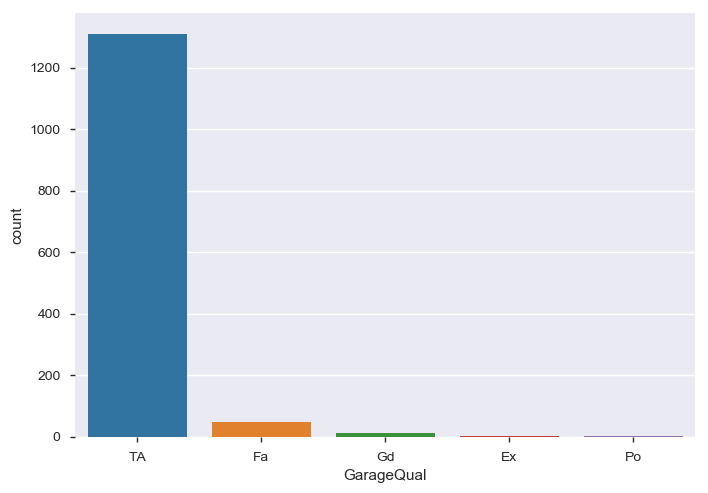

In [49]:
sns.countplot(df['GarageQual'])

GarageQual: Garage quality<br>
Here all missing values can be replaced with NA which means No Garage.

In [50]:
df['GarageQual']=df['GarageQual'].replace(np.nan,'NA')

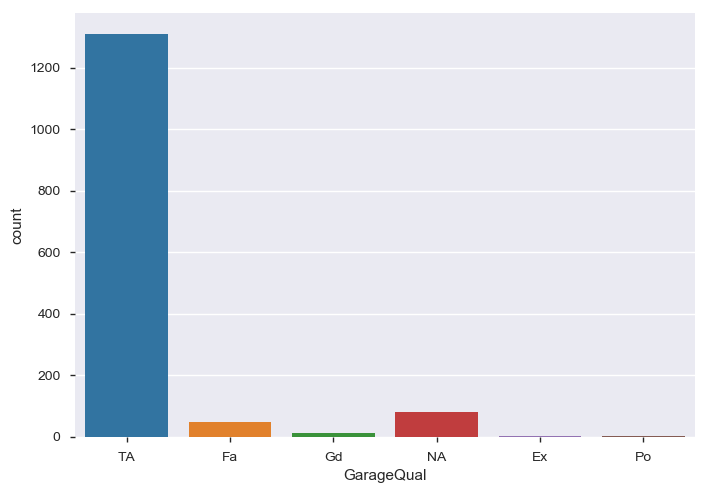

In [51]:
sns.countplot(df['GarageQual'])

In [52]:
#12.GarageType

df['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

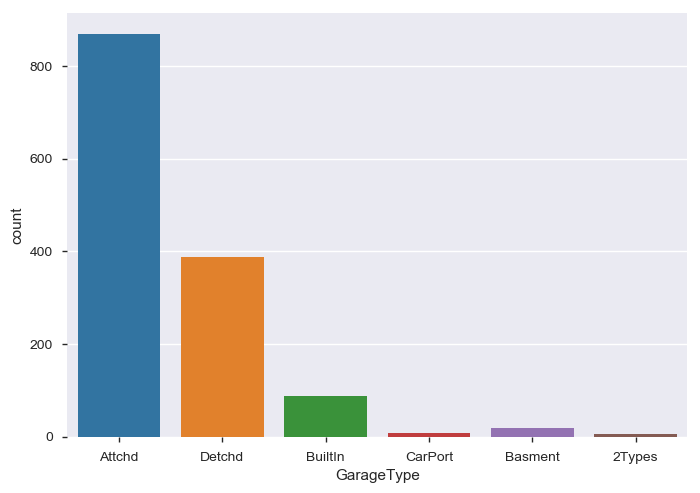

In [53]:
sns.countplot(df['GarageType'])

GarageType: Garage location<br>
Here all missing values can be replaced by NA which means No garage.


In [54]:
df['GarageType']=df['GarageType'].replace(np.nan,'NA')

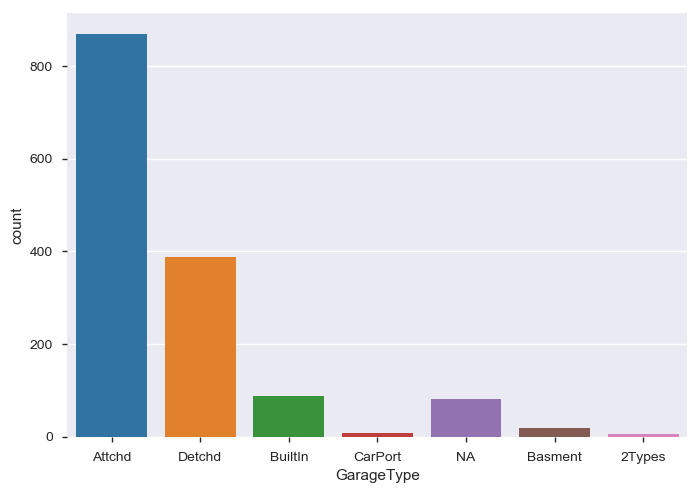

In [55]:
sns.countplot(df['GarageType'])

In [56]:
#13.GarageYrBlt 

df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

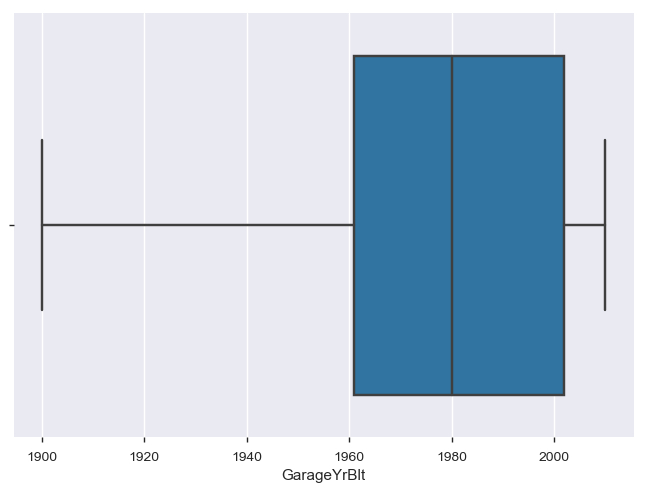

In [57]:
sns.boxplot(df['GarageYrBlt'])

GarageYrBlt: Year garage was built<br>
Here all missing values can be replaced by mean.

In [58]:
df['GarageYrBlt'].fillna((df['GarageYrBlt'].mean()), inplace=True)


In [59]:
df['GarageYrBlt'].describe()

count    1460.000000
mean     1978.506164
std        23.994583
min      1900.000000
25%      1962.000000
50%      1978.506164
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

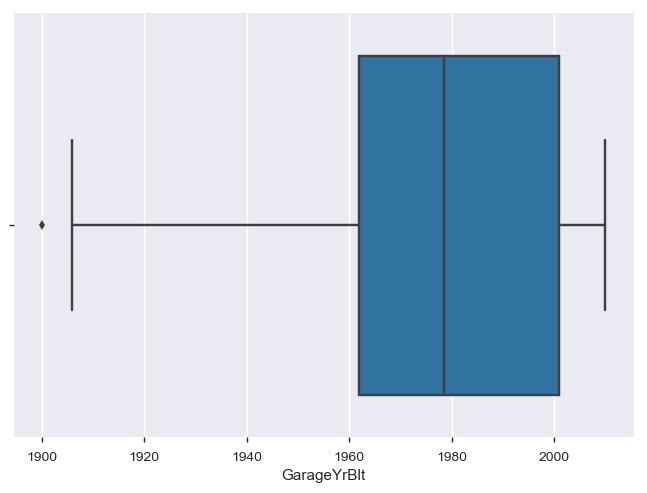

In [60]:
sns.boxplot(df['GarageYrBlt'])

In [61]:
#14. LotFrontage:

df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

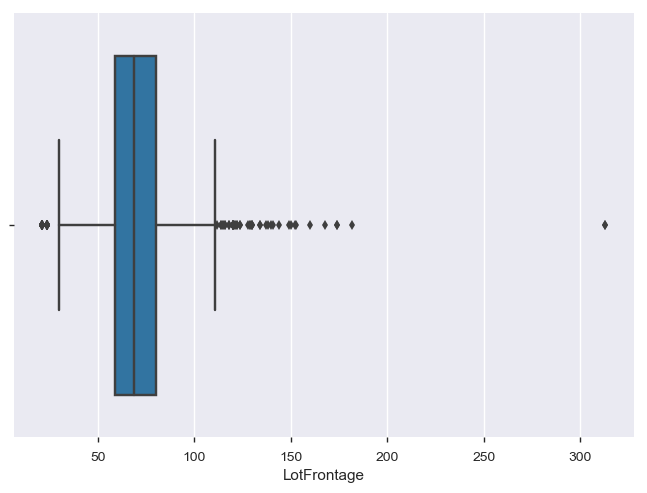

In [62]:
sns.boxplot(df['LotFrontage'])

LotFrontage: Linear feet of street connected to property<br>
All missing value can be replaced with the median.

In [63]:
df['LotFrontage'].fillna((df['LotFrontage'].median()),inplace=True)

In [64]:
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [65]:
#15.MiscFeature:

df['MiscFeature'].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

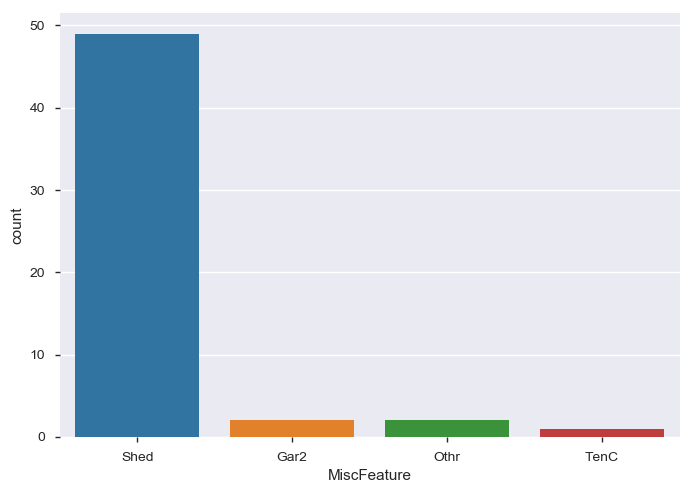

In [66]:
sns.countplot(df['MiscFeature'])

MiscFeature: Miscellaneous feature not covered in other categories<br>
Here all missing values can be replaced with NA which means none.

In [67]:
df['MiscFeature']=df['MiscFeature'].replace(np.nan,'NA')

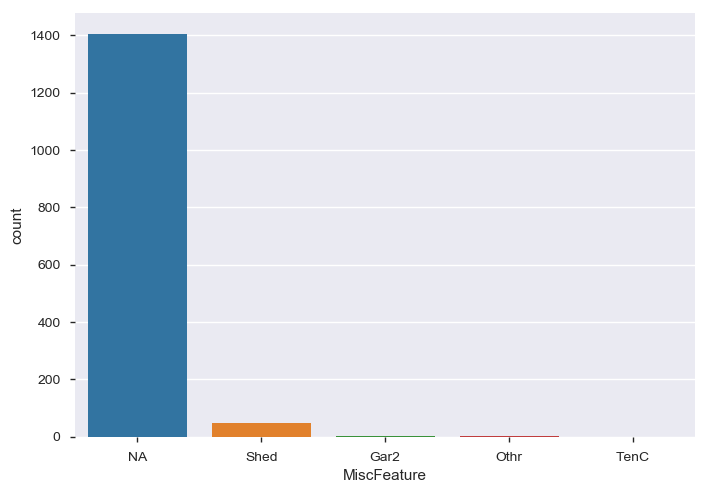

In [68]:
sns.countplot(df['MiscFeature'])

In [69]:
#16.PoolQC:

df['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

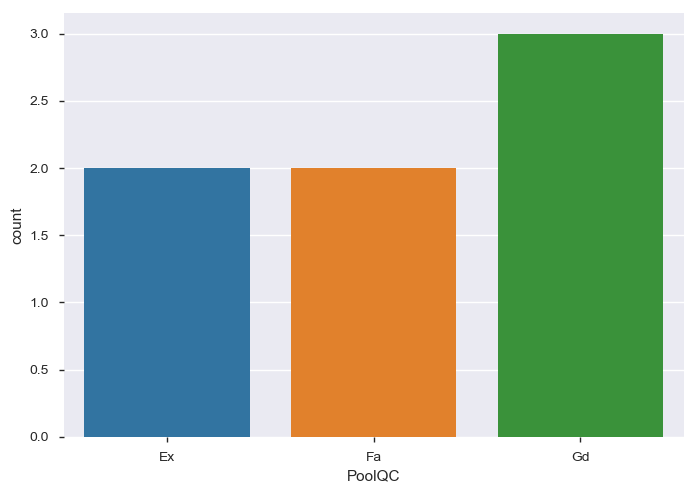

In [70]:
sns.countplot(df['PoolQC'])

PoolQC: Pool quality
Here all missing values can be replaced by NA which means no pool.

In [71]:
df['PoolQC']=df['PoolQC'].replace(np.nan,'NA')

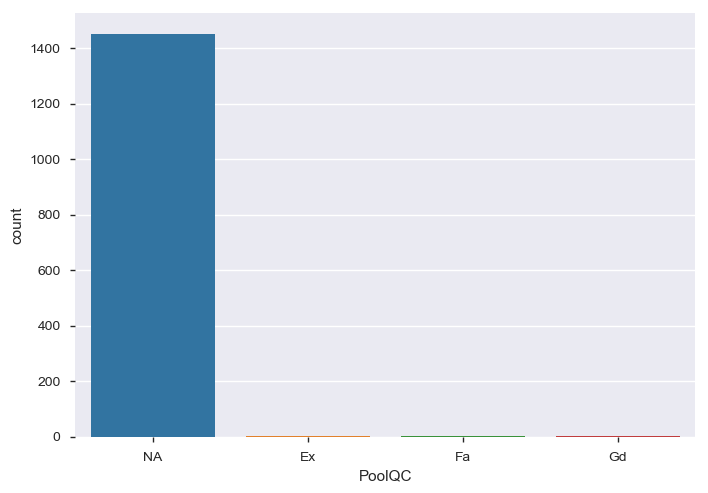

In [72]:
sns.countplot(df['PoolQC'])

In [73]:
round(100*(df.isnull().sum()/len(df.index)),2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

# Data Analysis:


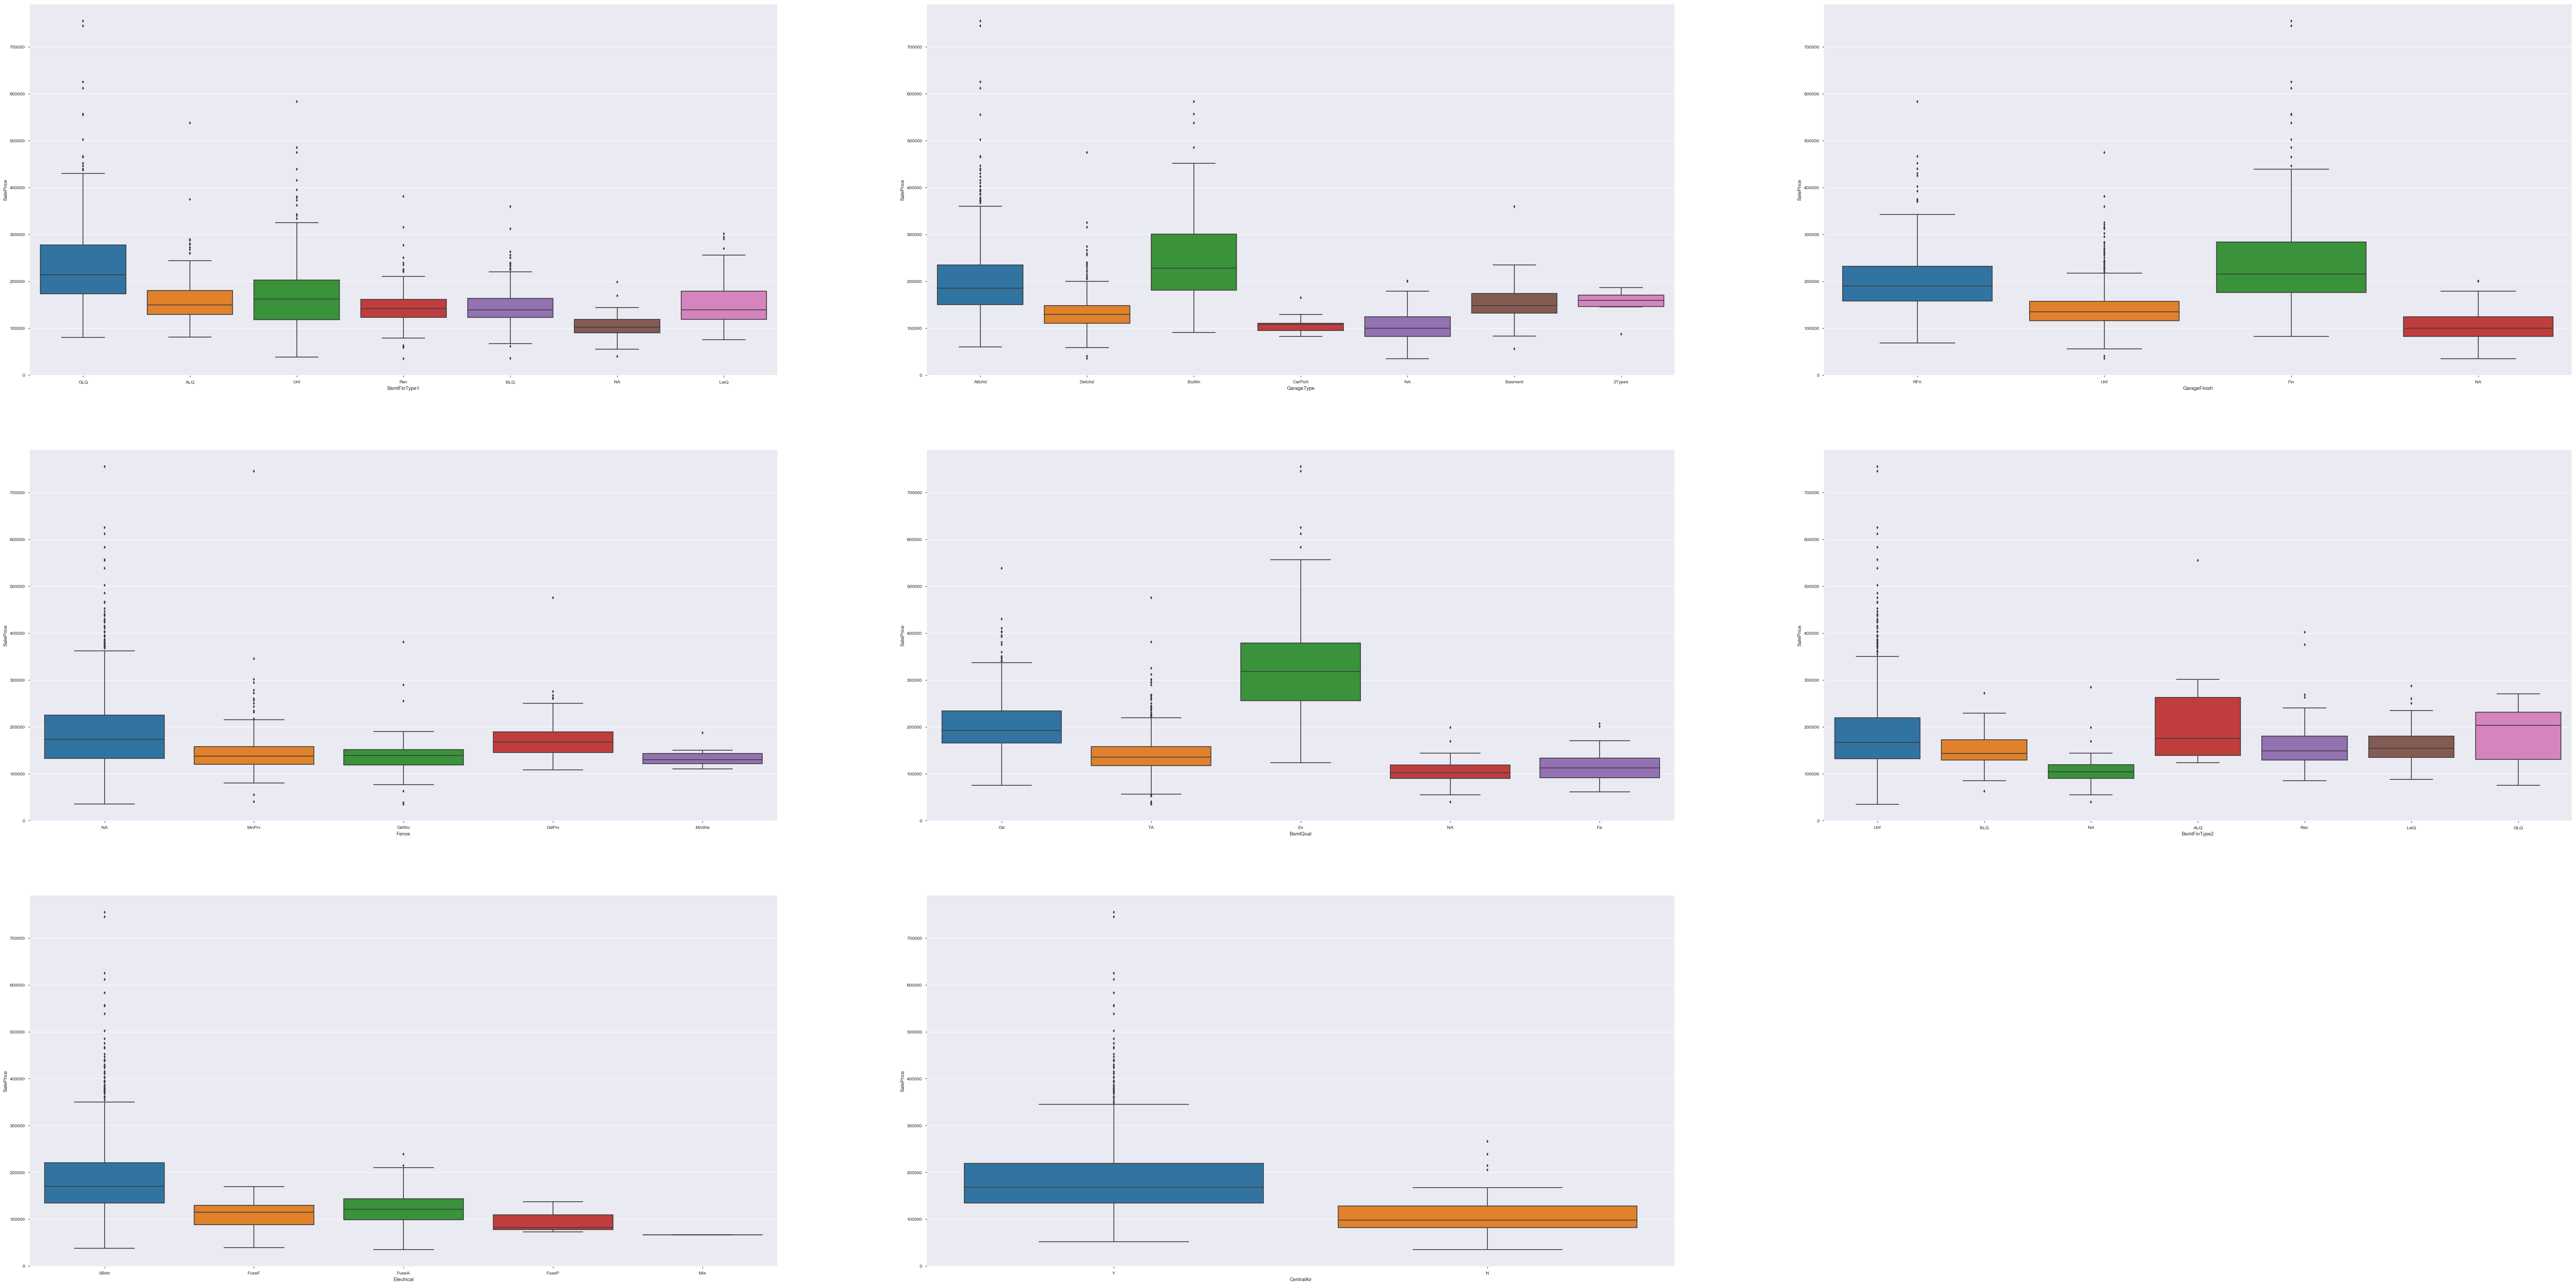

In [74]:
#Visualizing categorical data

plt.figure(figsize=(100, 50))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish' , y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df)
plt.subplot(3,3,7)
sns.boxplot(x=  'Electrical', y ='SalePrice', data = df)
plt.subplot(3,3,8)
sns.boxplot(x=  'CentralAir',y='SalePrice', data = df)
plt.show()

SalePrice is high for houses with Central Air conditioning.<br>
SalePrice is high for houses with SBrkr(Standard Circuit Breakers & Romex) elctrical system and low for  Mix(Mixed) electrical system.<br>
SalePrice is high for houses with GdPrv(Good Privacy) Fence Quality and low for MnWw(Minimum Wood/Wire).<br>
SalePrice is high for houses with Ex(Excellent) basement quality and low for houses with no basements.<br>
SalePrice is high for houses with BuiltIn Garage type and low for Houses with no garage.


### Creating a new column Houseage that is equal to the current year - YearBuilt: Original construction date

In [75]:
df['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
30      1920
31      1966
32      2007
33      1959
34      2005
35      2004
36      1994
37      1954
38      1953
39      1955
40      1965
41      1959
42      1983
43      1975
44      1959
45      2005
46      2003
47      2006
48      1920
49      1966
50      1997
51      1934
52      1963
53      1981
54      1955
55      1964
56      1999
57      2004
58      2006
59      1972
60      2004
61      1920
62      2006
63      1921
64      1997
65      2004
66      1970
67      2003
68      1945
69      1953
70      1973
71      1982
72      1998
73      1954
74      1915
75      1973
76      1956

In [76]:
df['Houseage']=2019-df['YearBuilt']

In [77]:
df['Houseage']

0        16
1        43
2        18
3       104
4        19
5        26
6        15
7        46
8        88
9        80
10       54
11       14
12       57
13       13
14       59
15       90
16       49
17       52
18       15
19       61
20       14
21       89
22       17
23       43
24       51
25       12
26       68
27       12
28       62
29       92
30       99
31       53
32       12
33       60
34       14
35       15
36       25
37       65
38       66
39       64
40       54
41       60
42       36
43       44
44       60
45       14
46       16
47       13
48       99
49       53
50       22
51       85
52       56
53       38
54       64
55       55
56       20
57       15
58       13
59       47
60       15
61       99
62       13
63       98
64       22
65       15
66       49
67       16
68       74
69       66
70       46
71       37
72       21
73       65
74      104
75       46
76       63
77       71
78       51
79      109
80       51
81       21
82       12
83  

Since there are 81 columns,analysing how each column varies with SalePrice will be a tedious process. So the top variables can be obtained using variable selection methods.(Lasso,rfe,PCA). Here I will use LASSO.

## Model Building:

In [78]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Id','SalePrice'], axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Houseage
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,406.958084,150.0,856.0,GasA,Ex,Y,SBrkr,856,854.000000,328.192308,1710,1.000000,1.02439,2,1.000000,3,1,Gd,8,Typ,1.162338,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,196.848355,61.000000,154.100962,207.416667,189.560345,575.428571,NA,NA,NA,1221.038462,2,2008,WD,Normal,16
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,254.739425,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,406.958084,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,802.866878,328.192308,1262,1.028146,1.00000,2,1.021938,3,1,TA,6,Typ,1.000000,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.000000,84.731343,154.100962,207.416667,189.560345,575.428571,NA,NA,NA,1221.038462,5,2007,WD,Normal,43
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,406.958084,434.0,920.0,GasA,Ex,Y,SBrkr,920,866.000000,328.192308,1786,1.000000,1.02439,2,1.000000,3,1,Gd,6,Typ,1.000000,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,196.848355,42.000000,154.100962,207.416667,189.560345,575.428571,NA,NA,NA,1221.038462,9,2008,WD,Normal,18
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,254.739425,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,406.958084,540.0,756.0,GasA,Gd,Y,SBrkr,961,756.000000,328.192308,1717,1.000000,1.02439,1,1.021938,3,1,Gd,7,Typ,1.000000,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,196.848355,35.000000,272.000000,207.416667,189.560345,575.428571,NA,NA,NA,1221.038462,2,2006,WD,Abnorml,104
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,406.958084,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053.000000,328.192308,2198,1.000000,1.02439,2,1.000000,4,1,Gd,9,Typ,1.000000,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.000000,84.000000,154.100962,207.416667,189.560345,575.428571,NA,NA,NA,1221.038462,12,2008,WD,Normal,19


In [79]:
#Putting response variable to y
y =df['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [80]:
#creating dummy variables for categorical variables

# selecting all categorical variables
df_cat = X.select_dtypes(include=['object'])
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [81]:
df_cat.shape

(1460, 43)

In [82]:
# convert categorical variables into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,

In [83]:
# drop categorical variables 
X = X.drop(list(df_cat.columns), axis=1)

In [84]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [85]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Houseage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondi

In [86]:
X.shape

(1460, 260)

In [87]:
from sklearn.preprocessing import StandardScaler

# storing column names in cols,
cols = X.columns
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=260)

In [88]:
# Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Lasso Regression:

In [89]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   12.2s finished
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101529,0.009127,0.000598,4.884617e-04,0.0001,{'alpha': 0.0001},-22415.949052,-20265.800646,-19925.749195,-18462.232740,-17890.345263,-19794.585344,1583.255228,17,-11191.649403,-11433.419426,-11341.034907,-11333.062396,-11083.114243,-11276.456075,123.762216
1,0.092951,0.010712,0.000998,2.780415e-07,0.001,{'alpha': 0.001},-22415.916698,-20265.944790,-19925.719269,-18462.140169,-17890.416140,-19794.597334,1583.251083,18,-11191.650199,-11433.418789,-11341.037151,-11333.065604,-11083.113556,-11276.457060,123.762688
2,0.098736,0.019142,0.000798,3.989936e-04,0.01,{'alpha': 0.01},-22415.593139,-20267.388724,-19925.420011,-18461.229560,-17891.124913,-19794.720752,1583.207485,19,-11191.659101,-11433.414790,-11341.061388,-11333.099728,-11083.119695,-11276.470941,123.764187
3,0.099733,0.012615,0.000798,3.989698e-04,0.05,{'alpha': 0.05},-22414.141392,-20273.803940,-19924.084161,-18457.418895,-17894.275053,-19795.312168,1582.974365,20,-11191.709673,-11433.401432,-11341.200815,-11333.299569,-11083.186815,-11276.559661,123.765759
4,0.105917,0.025092,0.000798,3.988506e-04,0.1,{'alpha': 0.1},-22412.315964,-20281.823594,-19922.404163,-18452.971716,-17898.215292,-19796.111053,1582.637029,21,-11191.785810,-11433.419893,-11341.438606,-11333.557130,-11083.284965,-11276.697281,123.777818
5,0.100331,0.010604,0.000798,3.989700e-04,0.2,{'alpha': 0.2},-22408.725244,-20297.986398,-19919.032605,-18447.846938,-17906.167443,-19798.510760,1581.367557,23,-11191.970160,-11433.496091,-11341.919521,-11334.073658,-11083.481264,-11276.988139,123.808358
6,0.099733,0.010760,0.000598,4.886555e-04,0.3,{'alpha': 0.3},-22405.117228,-20314.217163,-19915.597298,-18448.819693,-17914.080698,-19802.118375,1579.102254,25,-11192.150446,-11433.635579,-11342.396237,-11334.599839,-11083.679528,-11277.292326,123.855511
7,0.102134,0.011905,0.000797,3.983193e-04,0.4,{'alpha': 0.4},-22401.657185,-20330.362977,-19912.164769,-18446.328919,-17914.458923,-19803.541727,1579.307866,26,-11192.490106,-11433.752349,-11342.876046,-11335.163401,-11083.864637,-11277.629308,123.883126
8,0.097532,0.011997,0.000599,4.886944e-04,0.5,{'alpha': 0.5},-22397.982005,-20346.612917,-19908.838772,-18439.919508,-17913.740959,-19803.961989,1580.423843,27,-11192.742288,-11433.911921,-11343.356803,-11335.726013,-11084.061166,-11277.959638,123.930200
9,0.100730,0.010925,0.000799,3.992800e-04,0.6,{'alpha': 0.6},-22394.311103,-20367.849680,-19905.626097,-18432.880944,-17912.995361,-19805.270912,1582.052183,28,-11192.988110,-11433.865025,-11343.836809,-11336.294275,-11084.255431,-11278.247930,123.927629


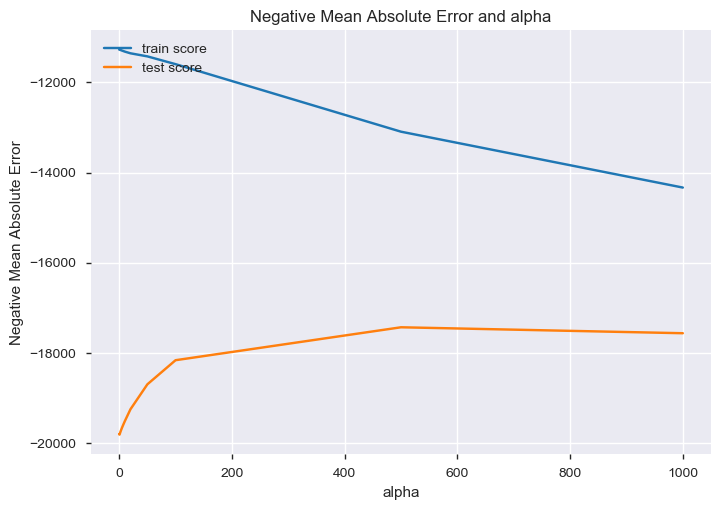

In [91]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [92]:
model_cv.best_params_

{'alpha': 500}

In [93]:
#alpha =500

lasso = Lasso(alpha=500)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
#Extracting the coefficients and model equation from lasso regression
lasso.coef_

array([-3.26608948e+03,  1.38579953e+03,  3.85069804e+03,  1.28432826e+04,
        5.73175048e+03,  5.81126171e+03,  2.91972838e+03,  3.08944563e+03,
        5.63100160e+03,  4.75786885e+02, -0.00000000e+00,  8.78655454e+03,
        0.00000000e+00,  2.96227807e+03, -1.77748840e+02,  3.14773443e+04,
        3.03030937e+02, -0.00000000e+00,  0.00000000e+00, -1.34981203e+03,
       -2.18762762e+03, -3.83545137e+03,  0.00000000e+00,  1.21756223e+03,
        3.49665804e+02,  2.77370539e+03,  1.77004385e+03,  0.00000000e+00,
        5.82702316e+02, -5.74873497e+02,  0.00000000e+00, -0.00000000e+00,
        2.56905031e+02, -0.00000000e+00, -1.13455940e+02,  0.00000000e+00,
       -3.79768152e+03,  0.00000000e+00,  0.00000000e+00,  1.42002676e+03,
       -0.00000000e+00,  9.17815567e+02,  1.08268018e+02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.60182062e+01, -2.77673505e+02,  1.87161070e+03,
       -3.53055429e+02, -

In [95]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print(list(zip(cols, model_parameters)))

[('constant', 179408.0), ('MSSubClass', -3266.1), ('LotFrontage', 1385.8), ('LotArea', 3850.7), ('OverallQual', 12843.3), ('OverallCond', 5731.8), ('YearBuilt', 5811.3), ('YearRemodAdd', 2919.7), ('MasVnrArea', 3089.4), ('BsmtFinSF1', 5631.0), ('BsmtFinSF2', 475.8), ('BsmtUnfSF', -0.0), ('TotalBsmtSF', 8786.6), ('1stFlrSF', 0.0), ('2ndFlrSF', 2962.3), ('LowQualFinSF', -177.7), ('GrLivArea', 31477.3), ('BsmtFullBath', 303.0), ('BsmtHalfBath', -0.0), ('FullBath', 0.0), ('HalfBath', -1349.8), ('BedroomAbvGr', -2187.6), ('KitchenAbvGr', -3835.5), ('TotRmsAbvGrd', 0.0), ('Fireplaces', 1217.6), ('GarageYrBlt', 349.7), ('GarageCars', 2773.7), ('GarageArea', 1770.0), ('WoodDeckSF', 0.0), ('OpenPorchSF', 582.7), ('EnclosedPorch', -574.9), ('3SsnPorch', 0.0), ('ScreenPorch', -0.0), ('PoolArea', 256.9), ('MiscVal', -0.0), ('MoSold', -113.5), ('YrSold', 0.0), ('Houseage', -3797.7), ('MSZoning_FV', 0.0), ('MSZoning_RH', 0.0), ('MSZoning_RL', 1420.0), ('MSZoning_RM', -0.0), ('Street_Pave', 917.8), (

## The variables are:
(constant', 179408.0), ('MSSubClass', -3266.1), ('LotFrontage', 1385.8), ('LotArea', 3850.7), ('OverallQual', 12843.3), ('OverallCond', 5731.8), ('YearBuilt', 5811.3), ('YearRemodAdd', 2919.7), ('MasVnrArea', 3089.4), ('BsmtFinSF1', 5631.0), ('BsmtFinSF2', 475.8), ('BsmtUnfSF', -0.0), ('TotalBsmtSF', 8786.6), ('1stFlrSF', 0.0), ('2ndFlrSF', 2962.3), ('LowQualFinSF', -177.7), ('GrLivArea', 31477.3), ('BsmtFullBath', 303.0), ('BsmtHalfBath', -0.0), ('FullBath', 0.0), ('HalfBath', -1349.8), ('BedroomAbvGr', -2187.6), ('KitchenAbvGr', -3835.5), ('TotRmsAbvGrd', 0.0), ('Fireplaces', 1217.6), ('GarageYrBlt', 349.7), ('GarageCars', 2773.7), ('GarageArea', 1770.0), ('WoodDeckSF', 0.0), ('OpenPorchSF', 582.7), ('EnclosedPorch', -574.9), ('3SsnPorch', 0.0), ('ScreenPorch', -0.0), ('PoolArea', 256.9), ('MiscVal', -0.0), ('MoSold', -113.5), ('YrSold', 0.0), ('Houseage', -3797.7), ('MSZoning_FV', 0.0), ('MSZoning_RH', 0.0), ('MSZoning_RL', 1420.0), ('MSZoning_RM', -0.0), ('Street_Pave', 917.8), ('Alley_No alley access', 108.3), ('Alley_Pave', -0.0), ('LotShape_IR2', 0.0), ('LotShape_IR3', -0.0), ('LotShape_Reg', 0.0), ('LandContour_HLS', 0.0), ('LandContour_Low', -0.0), ('LandContour_Lvl', 86.0), ('Utilities_NoSeWa', -277.7), ('LotConfig_CulDSac', 1871.6), ('LotConfig_FR2', -353.1), ('LotConfig_FR3', -0.0), ('LotConfig_Inside', 0.0), ('LandSlope_Mod', 0.0), ('LandSlope_Sev', -0.0), ('Neighborhood_Blueste', 0.0), ('Neighborhood_BrDale', -0.0), ('Neighborhood_BrkSide', 752.4), ('Neighborhood_ClearCr', -0.0), ('Neighborhood_CollgCr', 0.0), ('Neighborhood_Crawfor', 3723.8), ('Neighborhood_Edwards', -840.3), ('Neighborhood_Gilbert', 0.0), ('Neighborhood_IDOTRR', -0.0), ('Neighborhood_MeadowV', 0.0), ('Neighborhood_Mitchel', -1485.5), ('Neighborhood_NAmes', -1150.7), ('Neighborhood_NPkVill', 459.0), ('Neighborhood_NWAmes', -385.3), ('Neighborhood_NoRidge', 4682.4), ('Neighborhood_NridgHt', 4332.5), ('Neighborhood_OldTown', -0.0), ('Neighborhood_SWISU', 0.0), ('Neighborhood_Sawyer', -0.0), ('Neighborhood_SawyerW', 0.0), ('Neighborhood_Somerst', 3086.3), ('Neighborhood_StoneBr', 1735.7), ('Neighborhood_Timber', -164.2), ('Neighborhood_Veenker', 483.2), ('Condition1_Feedr', -14.9), ('Condition1_Norm', 2840.7), ('Condition1_PosA', 0.0), ('Condition1_PosN', 0.0), ('Condition1_RRAe', -1046.4), ('Condition1_RRAn', 66.5), ('Condition1_RRNe', 0.0), ('Condition1_RRNn', -0.0), ('Condition2_Feedr', -195.4), ('Condition2_Norm', 0.0), ('Condition2_PosA', 736.9), ('Condition2_PosN', -15113.3), ('Condition2_RRAe', -0.0), ('Condition2_RRAn', -0.0), ('Condition2_RRNn', 0.0), ('BldgType_2fmCon', 0.0), ('BldgType_Duplex', -973.5), ('BldgType_Twnhs', -895.1), ('BldgType_TwnhsE', -14.1), ('HouseStyle_1.5Unf', 198.4), ('HouseStyle_1Story', -166.1), ('HouseStyle_2.5Fin', -1821.2), ('HouseStyle_2.5Unf', -659.6), ('HouseStyle_2Story', 0.0), ('HouseStyle_SFoyer', 0.0), ('HouseStyle_SLvl', -0.0), ('RoofStyle_Gable', 0.0), ('RoofStyle_Gambrel', 0.0), ('RoofStyle_Hip', -0.0), ('RoofStyle_Mansard', 242.4), ('RoofStyle_Shed', 308.3), ('RoofMatl_CompShg', -0.0), ('RoofMatl_Membran', 388.0), ('RoofMatl_Metal', 0.0), ('RoofMatl_Roll', 0.0), ('RoofMatl_Tar&Grv', -0.0), ('RoofMatl_WdShake', -0.0), ('RoofMatl_WdShngl', 3676.8), ('Exterior1st_AsphShn', -289.5), ('Exterior1st_BrkComm', -270.8), ('Exterior1st_BrkFace', 1923.3), ('Exterior1st_CBlock', -0.0), ('Exterior1st_CemntBd', 0.0), ('Exterior1st_HdBoard', -37.2), ('Exterior1st_ImStucc', -208.1), ('Exterior1st_MetalSd', 0.0), ('Exterior1st_Plywood', -1469.8), ('Exterior1st_Stone', -187.2), ('Exterior1st_Stucco', 0.0), ('Exterior1st_VinylSd', 40.1), ('Exterior1st_Wd Sdng', -0.0), ('Exterior1st_WdShing', 21.4), ('Exterior2nd_AsphShn', -0.0), ('Exterior2nd_Brk Cmn', 0.0), ('Exterior2nd_BrkFace', 0.0), ('Exterior2nd_CBlock', -0.0), ('Exterior2nd_CmentBd', 893.7), ('Exterior2nd_HdBoard', -0.0), ('Exterior2nd_ImStucc', 635.8), ('Exterior2nd_MetalSd', 0.0), ('Exterior2nd_Other', 0.0), ('Exterior2nd_Plywood', -0.0), ('Exterior2nd_Stone', 0.0), ('Exterior2nd_Stucco', -0.0), ('Exterior2nd_VinylSd', 562.9), ('Exterior2nd_Wd Sdng', -117.7), ('Exterior2nd_Wd Shng', -406.2), ('MasVnrType_BrkFace', -0.0), ('MasVnrType_None', 0.0), ('MasVnrType_Stone', 625.0), ('ExterQual_Fa', -0.0), ('ExterQual_Gd', -0.0), ('ExterQual_TA', -1720.9), ('ExterCond_Fa', -0.0), ('ExterCond_Gd', -0.0), ('ExterCond_Po', 0.0), ('ExterCond_TA', 0.0), ('Foundation_CBlock', -0.0), ('Foundation_PConc', 603.2), ('Foundation_Slab', -483.7), ('Foundation_Stone', 0.0), ('Foundation_Wood', -35.3), ('BsmtQual_Fa', -271.4), ('BsmtQual_Gd', -8789.1), ('BsmtQual_NA', -0.0), ('BsmtQual_TA', -5501.2), ('BsmtCond_Gd', -0.0), ('BsmtCond_NA', -0.0), ('BsmtCond_Po', -0.0), ('BsmtCond_TA', 945.5), ('BsmtExposure_Gd', 5139.3), ('BsmtExposure_Mn', -0.0), ('BsmtExposure_NA', -917.0), ('BsmtExposure_No', -2322.6), ('BsmtFinType1_BLQ', 661.3), ('BsmtFinType1_GLQ', 2443.1), ('BsmtFinType1_LwQ', -0.0), ('BsmtFinType1_NA', -0.0), ('BsmtFinType1_Rec', -289.9), ('BsmtFinType1_Unf', -3628.0), ('BsmtFinType2_BLQ', -187.6), ('BsmtFinType2_GLQ', 397.6), ('BsmtFinType2_LwQ', -277.7), ('BsmtFinType2_NA', -2176.8), ('BsmtFinType2_Rec', -0.0), ('BsmtFinType2_Unf', 0.0), ('Heating_GasA', 0.0), ('Heating_GasW', -0.0), ('Heating_Grav', -0.0), ('Heating_OthW', -1717.9), ('Heating_Wall', 441.8), ('HeatingQC_Fa', -0.0), ('HeatingQC_Gd', -221.2), ('HeatingQC_Po', 0.0), ('HeatingQC_TA', -572.0), ('CentralAir_Y', 0.0), ('Electrical_FuseF', 0.0), ('Electrical_FuseP', -239.6), ('Electrical_Mix', 0.0), ('Electrical_SBrkr', 0.0), ('KitchenQual_Fa', -2078.7), ('KitchenQual_Gd', -9780.7), ('KitchenQual_TA', -8556.6), ('Functional_Maj2', -727.6), ('Functional_Min1', 0.0), ('Functional_Min2', 0.0), ('Functional_Mod', -420.1), ('Functional_Sev', -1330.9), ('Functional_Typ', 2642.8), ('FireplaceQu_Fa', -0.0), ('FireplaceQu_Gd', 0.0), ('FireplaceQu_NA', -881.5), ('FireplaceQu_Po', 0.0), ('FireplaceQu_TA', 0.0), ('GarageType_Attchd', 0.0), ('GarageType_Basment', -370.8), ('GarageType_BuiltIn', 348.6), ('GarageType_CarPort', 0.0), ('GarageType_Detchd', 0.0), ('GarageType_NA', -257.1), ('GarageFinish_NA', -0.0), ('GarageFinish_RFn', -849.7), ('GarageFinish_Unf', -0.0), ('GarageQual_Fa', -0.0), ('GarageQual_Gd', 631.2), ('GarageQual_NA', -0.2), ('GarageQual_Po', -0.0), ('GarageQual_TA', 450.1), ('GarageCond_Fa', 0.0), ('GarageCond_Gd', -0.0), ('GarageCond_NA', -8.2), ('GarageCond_Po', -0.0), ('GarageCond_TA', 750.5), ('PavedDrive_P', -0.0), ('PavedDrive_Y', 0.0), ('PoolQC_Fa', -0.0), ('PoolQC_Gd', -29461.1), ('PoolQC_NA', -2060.2), ('Fence_GdWo', -0.0), ('Fence_MnPrv', 232.0), ('Fence_MnWw', 81.4), ('Fence_NA', 0.0), ('MiscFeature_NA', -0.0), ('MiscFeature_Othr', 0.0), ('MiscFeature_Shed', 0.0), ('MiscFeature_TenC', 0.0), ('SaleType_CWD', 62.9), ('SaleType_Con', 505.3), ('SaleType_ConLD', 0.0), ('SaleType_ConLI', -0.0), ('SaleType_ConLw', 0.0), ('SaleType_New', 4463.3), ('SaleType_Oth', 0.0), ('SaleType_WD', 0.0), ('SaleCondition_AdjLand', 162.1), ('SaleCondition_Alloca', 0.0), ('SaleCondition_Family', -0.0), ('SaleCondition_Normal', 425.4), ('SaleCondition_Partial', 0.0)

In [96]:
# model with optimal alpha=500
lm1 = Lasso(alpha=500)
lm1.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm1.predict(X_train)
y_test_pred = lm1.predict(X_test)

r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.518480636133531


In [99]:
#AIC and BIC Calculation
n= 1021 # n is equal to total datapoints on which model is built
k= 260 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:1357264664536.731
AIC:21969.121744722248
BIC:23250.54157744506


# Ridge Regression:

In [100]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=140]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013353,0.017263,0.000798,3.988745e-04,0.0001,{'alpha': 0.0001},-22362.295868,-20482.866057,-20034.878416,-18537.151713,-17892.139389,-19864.315289,1569.774070,28,-11166.526486,-11417.377199,-11312.171186,-11312.382698,-11083.159372,-11258.323388,118.515158
1,0.005379,0.000480,0.000612,5.003024e-04,0.001,{'alpha': 0.001},-22361.846275,-20482.024628,-20032.773915,-18536.315389,-17892.080586,-19863.457559,1569.674671,27,-11166.661966,-11417.368047,-11312.265554,-11312.405821,-11083.182081,-11258.376694,118.495696
2,0.005386,0.000489,0.000598,4.883444e-04,0.01,{'alpha': 0.01},-22357.387519,-20473.793798,-20012.324864,-18528.061412,-17891.486926,-19855.064162,1568.718104,26,-11167.983400,-11417.308489,-11313.219215,-11312.639842,-11083.408954,-11258.911980,118.317143
3,0.005785,0.000748,0.000797,3.986129e-04,0.05,{'alpha': 0.05},-22346.539159,-20440.985103,-19932.625750,-18493.609296,-17888.731462,-19822.972239,1567.802001,25,-11173.213381,-11417.160703,-11319.620936,-11317.329383,-11084.412344,-11262.347349,118.216913
4,0.004589,0.000488,0.000996,6.503192e-07,0.1,{'alpha': 0.1},-22342.039548,-20409.341342,-19856.626514,-18455.003983,-17885.046211,-19792.111449,1570.465258,24,-11178.701641,-11418.877643,-11327.371148,-11323.451867,-11085.698194,-11266.820099,118.798224


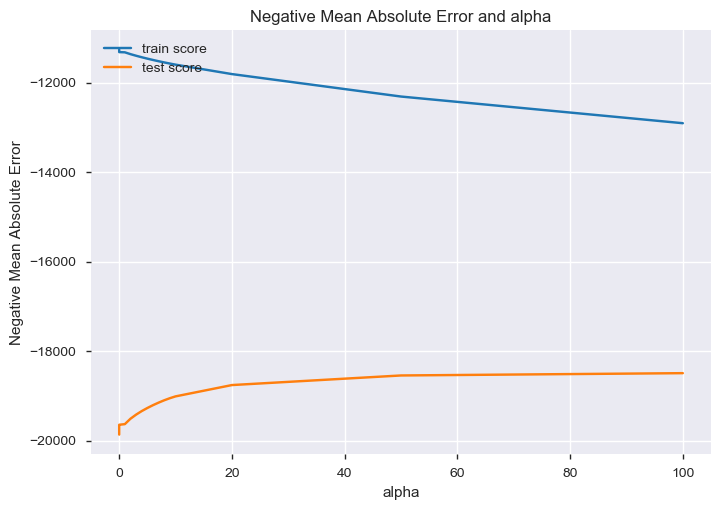

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
model_cv.best_params_


{'alpha': 100}

In [105]:
#alpha = 100
ridge = Ridge(alpha=100)

ridge.fit(X_train, y_train)
#Predictor Variables from the Model built using Ridge Regression:
ridge.coef_

array([-2.26551497e+03,  1.70894372e+03,  4.71648535e+03,  1.08289607e+04,
        4.45200554e+03,  3.02241412e+03,  3.51177614e+03,  3.40254561e+03,
        4.66420957e+03,  9.55123423e+02, -6.02477514e+02,  7.03768794e+03,
        6.42520534e+03,  5.96937067e+03, -6.90248646e+02,  1.47852561e+04,
        1.70112087e+02, -9.12239198e+01,  2.52574963e+03, -1.16325294e+03,
       -1.49412995e+03, -3.00294663e+03,  3.42497085e+03,  2.00991246e+03,
        5.89596994e+02,  3.31971444e+03,  2.06059295e+03,  1.09056650e+03,
        1.03055839e+03, -3.50332849e+01,  4.82229381e+02, -1.01481832e+03,
        7.99375530e+03, -3.30339929e+01, -4.16506923e+02, -3.96054572e+02,
       -3.02241412e+03,  9.52940114e+02,  2.36986353e+02,  2.09772336e+03,
        2.95204127e+02,  1.33505357e+03,  3.43307373e+02, -1.44412438e+02,
       -7.19368942e+01, -1.04510438e+03,  4.88362136e+02,  1.26622864e+03,
       -2.69564945e+02,  1.42131332e+03, -5.53171677e+02,  2.61616900e+03,
       -1.35110673e+03, -

In [106]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 179875.199),
 ('MSSubClass', -2265.515),
 ('LotFrontage', 1708.944),
 ('LotArea', 4716.485),
 ('OverallQual', 10828.961),
 ('OverallCond', 4452.006),
 ('YearBuilt', 3022.414),
 ('YearRemodAdd', 3511.776),
 ('MasVnrArea', 3402.546),
 ('BsmtFinSF1', 4664.21),
 ('BsmtFinSF2', 955.123),
 ('BsmtUnfSF', -602.478),
 ('TotalBsmtSF', 7037.688),
 ('1stFlrSF', 6425.205),
 ('2ndFlrSF', 5969.371),
 ('LowQualFinSF', -690.249),
 ('GrLivArea', 14785.256),
 ('BsmtFullBath', 170.112),
 ('BsmtHalfBath', -91.224),
 ('FullBath', 2525.75),
 ('HalfBath', -1163.253),
 ('BedroomAbvGr', -1494.13),
 ('KitchenAbvGr', -3002.947),
 ('TotRmsAbvGrd', 3424.971),
 ('Fireplaces', 2009.912),
 ('GarageYrBlt', 589.597),
 ('GarageCars', 3319.714),
 ('GarageArea', 2060.593),
 ('WoodDeckSF', 1090.566),
 ('OpenPorchSF', 1030.558),
 ('EnclosedPorch', -35.033),
 ('3SsnPorch', 482.229),
 ('ScreenPorch', -1014.818),
 ('PoolArea', 7993.755),
 ('MiscVal', -33.034),
 ('MoSold', -416.507),
 ('YrSold', -396.055),
 ('House

In [107]:
#model with optimal alpha
lm2 = Ridge(alpha=100)
lm2.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_train_pred = lm2.predict(X_train)
y_test_pred = lm2.predict(X_test)

r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))


R Square score:0.7906987285515594


The optimal values of lambda or the hyerparameters for :<br>
1.Lasso is 500.<br>
2.Ridge is 100.<br>


## The key predictor variables for predicting the Sale Price are as follows:<br>
('constant', 179875.199),
('MSSubClass', -2265.515),
('LotFrontage', 1708.944),
('LotArea', 4716.485),
 ('OverallQual', 10828.961),
 ('OverallCond', 4452.006),
 ('YearBuilt', 3022.414),
 ('YearRemodAdd', 3511.776),
 ('MasVnrArea', 3402.546),
 ('BsmtFinSF1', 4664.21),
 ('BsmtFinSF2', 955.123),
 ('BsmtUnfSF', -602.478),
 ('TotalBsmtSF', 7037.688),
 ('1stFlrSF', 6425.205),
 ('2ndFlrSF', 5969.371),
 ('LowQualFinSF', -690.249),
 ('GrLivArea', 14785.256),
 ('BsmtFullBath', 170.112),
 ('BsmtHalfBath', -91.224),
 ('FullBath', 2525.75),
 ('HalfBath', -1163.253),
 ('BedroomAbvGr', -1494.13),
 ('KitchenAbvGr', -3002.947),
 ('TotRmsAbvGrd', 3424.971),
 ('Fireplaces', 2009.912),
 ('GarageYrBlt', 589.597),
 ('GarageCars', 3319.714),
 ('GarageArea', 2060.593),
 ('WoodDeckSF', 1090.566),
 ('OpenPorchSF', 1030.558),
 ('EnclosedPorch', -35.033),
 ('3SsnPorch', 482.229),
 ('ScreenPorch', -1014.818),
 ('PoolArea', 7993.755),
 ('MiscVal', -33.034),
 ('MoSold', -416.507),
 ('YrSold', -396.055),
 ('Houseage', -3022.414),
 ('MSZoning_FV', 952.94),
 ('MSZoning_RH', 236.986),
 ('MSZoning_RL', 2097.723),
 ('MSZoning_RM', 295.204),
 ('Street_Pave', 1335.054),
 ('Alley_No alley access', 343.307),
 ('Alley_Pave', -144.412),
 ('LotShape_IR2', -71.937),
 ('LotShape_IR3', -1045.104),
 ('LotShape_Reg', 488.362),
 ('LandContour_HLS', 1266.229),
 ('LandContour_Low', -269.565),
 ('LandContour_Lvl', 1421.313),
 ('Utilities_NoSeWa', -553.172),
 ('LotConfig_CulDSac', 2616.169),
 ('LotConfig_FR2', -1351.107),
 ('LotConfig_FR3', -167.921),
 ('LotConfig_Inside', -313.276),
 ('LandSlope_Mod', 663.032),
 ('LandSlope_Sev', -898.76),
 ('Neighborhood_Blueste', 262.125),
 ('Neighborhood_BrDale', 322.11),
 ('Neighborhood_BrkSide', 826.581),
 ('Neighborhood_ClearCr', -456.271),
 ('Neighborhood_CollgCr', -995.588),
 ('Neighborhood_Crawfor', 3595.232),
 ('Neighborhood_Edwards', -2342.015),
 ('Neighborhood_Gilbert', -884.865),
 ('Neighborhood_IDOTRR', -489.577),
 ('Neighborhood_MeadowV', -445.056),
 ('Neighborhood_Mitchel', -2400.706),
 ('Neighborhood_NAmes', -2448.741),
 ('Neighborhood_NPkVill', 872.694),
 ('Neighborhood_NWAmes', -1453.892),
 ('Neighborhood_NoRidge', 5431.929),
 ('Neighborhood_NridgHt', 4574.633),
 ('Neighborhood_OldTown', -855.526),
 ('Neighborhood_SWISU', 537.502),
 ('Neighborhood_Sawyer', -912.677),
 ('Neighborhood_SawyerW', 153.381),
 ('Neighborhood_Somerst', 2427.136),
 ('Neighborhood_StoneBr', 2920.549),
 ('Neighborhood_Timber', -830.253),
 ('Neighborhood_Veenker', 1109.471),
 ('Condition1_Feedr', -1106.328),
 ('Condition1_Norm', 2588.412),
 ('Condition1_PosA', 713.574),
 ('Condition1_PosN', 199.664),
 ('Condition1_RRAe', -1595.487),
 ('Condition1_RRAn', 678.995),
 ('Condition1_RRNe', -64.043),
 ('Condition1_RRNn', -89.991),
 ('Condition2_Feedr', 386.484),
 ('Condition2_Norm', 1862.988),
 ('Condition2_PosA', 1600.325),
 ('Condition2_PosN', -12017.09),
 ('Condition2_RRAe', -767.146),
 ('Condition2_RRAn', 330.805),
 ('Condition2_RRNn', 1164.268),
 ('BldgType_2fmCon', -1098.581),
 ('BldgType_Duplex', -1876.504),
 ('BldgType_Twnhs', -1926.108),
 ('BldgType_TwnhsE', -1855.098),
 ('HouseStyle_1.5Unf', -626.364),
 ('HouseStyle_1Story', -5555.258),
 ('HouseStyle_2.5Fin', -1419.382),
 ('HouseStyle_2.5Unf', -1447.989),
 ('HouseStyle_2Story', 465.404),
 ('HouseStyle_SFoyer', -1693.712),
 ('HouseStyle_SLvl', -2103.882),
 ('RoofStyle_Gable', -666.891),
 ('RoofStyle_Gambrel', 309.818),
 ('RoofStyle_Hip', -476.357),
 ('RoofStyle_Mansard', 576.556),
 ('RoofStyle_Shed', 2381.599),
 ('RoofMatl_CompShg', 1991.76),
 ('RoofMatl_Membran', 1314.352),
 ('RoofMatl_Metal', 600.934),
 ('RoofMatl_Roll', 288.618),
 ('RoofMatl_Tar&Grv', 1364.645),
 ('RoofMatl_WdShake', 692.916),
 ('RoofMatl_WdShngl', 5308.601),
 ('Exterior1st_AsphShn', -305.87),
 ('Exterior1st_BrkComm', -478.556),
 ('Exterior1st_BrkFace', 2011.814),
 ('Exterior1st_CBlock', -59.697),
 ('Exterior1st_CemntBd', -266.037),
 ('Exterior1st_HdBoard', -996.119),
 ('Exterior1st_ImStucc', -699.377),
 ('Exterior1st_MetalSd', 142.419),
 ('Exterior1st_Plywood', -1552.427),
 ('Exterior1st_Stone', -114.978),
 ('Exterior1st_Stucco', 199.398),
 ('Exterior1st_VinylSd', 715.429),
 ('Exterior1st_Wd Sdng', -216.609),
 ('Exterior1st_WdShing', 660.987),
 ('Exterior2nd_AsphShn', -176.715),
 ('Exterior2nd_Brk Cmn', 237.421),
 ('Exterior2nd_BrkFace', 292.452),
 ('Exterior2nd_CBlock', -59.697),
 ('Exterior2nd_CmentBd', 1607.186),
 ('Exterior2nd_HdBoard', -54.829),
 ('Exterior2nd_ImStucc', 1483.135),
 ('Exterior2nd_MetalSd', 128.077),
 ('Exterior2nd_Other', 0.0),
 ('Exterior2nd_Plywood', -438.34),
 ('Exterior2nd_Stone', -100.881),
 ('Exterior2nd_Stucco', -253.155),
 ('Exterior2nd_VinylSd', 286.126),
 ('Exterior2nd_Wd Sdng', -633.229),
 ('Exterior2nd_Wd Shng', -1635.849),
 ('MasVnrType_BrkFace', -2.345),
 ('MasVnrType_None', -445.185),
 ('MasVnrType_Stone', 919.288),
 ('ExterQual_Fa', -715.055),
 ('ExterQual_Gd', -3015.377),
 ('ExterQual_TA', -4819.096),
 ('ExterCond_Fa', -395.356),
 ('ExterCond_Gd', -253.894),
 ('ExterCond_Po', 0.0),
 ('ExterCond_TA', 170.788),
 ('Foundation_CBlock', 730.278),
 ('Foundation_PConc', 1440.216),
 ('Foundation_Slab', -915.872),
 ('Foundation_Stone', 818.541),
 ('Foundation_Wood', -130.221),
 ('BsmtQual_Fa', -687.405),
 ('BsmtQual_Gd', -8180.904),
 ('BsmtQual_NA', -719.058),
 ('BsmtQual_TA', -5321.057),
 ('BsmtCond_Gd', -105.139),
 ('BsmtCond_NA', -719.058),
 ('BsmtCond_Po', 846.173),
 ('BsmtCond_TA', 700.324),
 ('BsmtExposure_Gd', 4717.28),
 ('BsmtExposure_Mn', -479.534),
 ('BsmtExposure_NA', -917.077),
 ('BsmtExposure_No', -2884.716),
 ('BsmtFinType1_BLQ', 460.695),
 ('BsmtFinType1_GLQ', 3249.381),
 ('BsmtFinType1_LwQ', -344.759),
 ('BsmtFinType1_NA', -719.058),
 ('BsmtFinType1_Rec', -746.04),
 ('BsmtFinType1_Unf', -3277.611),
 ('BsmtFinType2_BLQ', -757.365),
 ('BsmtFinType2_GLQ', 599.277),
 ('BsmtFinType2_LwQ', -623.842),
 ('BsmtFinType2_NA', -1150.373),
 ('BsmtFinType2_Rec', -582.917),
 ('BsmtFinType2_Unf', -625.473),
 ('Heating_GasA', 39.291),
 ('Heating_GasW', 451.232),
 ('Heating_Grav', -167.426),
 ('Heating_OthW', -1712.604),
 ('Heating_Wall', 823.587),
 ('HeatingQC_Fa', -253.323),
 ('HeatingQC_Gd', -1072.586),
 ('HeatingQC_Po', 24.568),
 ('HeatingQC_TA', -1318.058),
 ('CentralAir_Y', 603.583),
 ('Electrical_FuseF', 361.673),
 ('Electrical_FuseP', -68.445),
 ('Electrical_Mix', 0.0),
 ('Electrical_SBrkr', 117.409),
 ('KitchenQual_Fa', -1524.335),
 ('KitchenQual_Gd', -7578.123),
 ('KitchenQual_TA', -6230.693),
 ('Functional_Maj2', -1202.351),
 ('Functional_Min1', 422.926),
 ('Functional_Min2', 638.85),
 ('Functional_Mod', -752.994),
 ('Functional_Sev', -1469.871),
 ('Functional_Typ', 3073.483),
 ('FireplaceQu_Fa', -977.175),
 ('FireplaceQu_Gd', -461.483),
 ('FireplaceQu_NA', -2895.726),
 ('FireplaceQu_Po', -430.018),
 ('FireplaceQu_TA', -610.483),
 ('GarageType_Attchd', 228.525),
 ('GarageType_Basment', -611.618),
 ('GarageType_BuiltIn', 808.797),
 ('GarageType_CarPort', 595.672),
 ('GarageType_Detchd', -55.598),
 ('GarageType_NA', -468.973),
 ('GarageFinish_NA', -468.973),
 ('GarageFinish_RFn', -1651.545),
 ('GarageFinish_Unf', -830.989),
 ('GarageQual_Fa', -866.493),
 ('GarageQual_Gd', 1359.001),
 ('GarageQual_NA', -468.973),
 ('GarageQual_Po', -497.161),
 ('GarageQual_TA', 250.079),
 ('GarageCond_Fa', -65.925),
 ('GarageCond_Gd', -716.905),
 ('GarageCond_NA', -468.973),
 ('GarageCond_Po', -184.396),
 ('GarageCond_TA', 381.193),
 ('PavedDrive_P', 31.749),
 ('PavedDrive_Y', 403.666),
 ('PoolQC_Fa', -4658.199),
 ('PoolQC_Gd', -18090.027),
 ('PoolQC_NA', -5054.133),
 ('Fence_GdWo', -33.377),
 ('Fence_MnPrv', 1650.058),
 ('Fence_MnWw', 684.013),
 ('Fence_NA', 901.151),
 ('MiscFeature_NA', 47.094),
 ('MiscFeature_Othr', 499.437),
 ('MiscFeature_Shed', 247.625),
 ('MiscFeature_TenC', 0.0),
 ('SaleType_CWD', 646.878),
 ('SaleType_Con', 760.549),
 ('SaleType_ConLD', 1262.773),
 ('SaleType_ConLI', 75.659),
 ('SaleType_ConLw', 478.375),
 ('SaleType_New', 2413.684),
 ('SaleType_Oth', 128.968),
 ('SaleType_WD', 623.857),
 ('SaleCondition_AdjLand', 653.966),
 ('SaleCondition_Alloca', 810.679),
 ('SaleCondition_Family', -511.628),
 ('SaleCondition_Normal', 853.152),
 ('SaleCondition_Partial', 2387.222

R2 score provides a measure of how well future samples are likely to be predicted by the model.r2 score=0.79 is obtained for Ridge and 0.51 for Lasso.